In [129]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# import pyspark.pandas as ps
import seaborn as sns
from pyspark.sql import SparkSession

In [130]:
df = pd.read_csv('../../Files/Submissions/score/done/author_db.csv')

In [131]:
df.head()

,Unnamed: 0,score,score.1,score.2
0,class_II,0.0,1.0,2.0
1,author,NaN,NaN,NaN
2,------------------16,NaN,1.0,NaN
3,------------------GL,1.0,NaN,1.0
4,------------------O,NaN,5.0,NaN


In [132]:
df = df.drop([0,1], axis=0)

In [133]:
df.rename({'Unnamed: 0': 'Author', 'score' : 'Anti-Vaccine Posts', 'score.1': 'Neutral Posts', 'score.2': 'Pro-Vaccine Posts'}, axis=1, inplace=True)

In [134]:
df.reset_index(drop=True, inplace=True)

In [135]:
df = df.fillna(0)

In [136]:
df['total'] = df['Anti-Vaccine Posts'] + df['Pro-Vaccine Posts'] + df['Neutral Posts']

In [137]:
df['p_an'] = df['Anti-Vaccine Posts'] / df['total']

In [138]:
df.head()

,Author,Anti-Vaccine Posts,Neutral Posts,Pro-Vaccine Posts,total,p_an
0,------------------16,0.0,1.0,0.0,1.0,0.0
1,------------------GL,1.0,0.0,1.0,2.0,0.5
2,------------------O,0.0,5.0,0.0,5.0,0.0
3,------------------fd,0.0,1.0,0.0,1.0,0.0
4,-----------------yes,0.0,1.0,0.0,1.0,0.0


In [139]:
top_10 = df.sort_values(by='Anti-Vaccine Posts', ascending=False)[1:11].reset_index(drop=True)

In [140]:
top_20 = df.sort_values(by='Anti-Vaccine Posts', ascending=False)[1:21].reset_index(drop=True)

In [141]:
top_11 = df.sort_values(by='Anti-Vaccine Posts', ascending=False)[0:11].reset_index(drop=True)

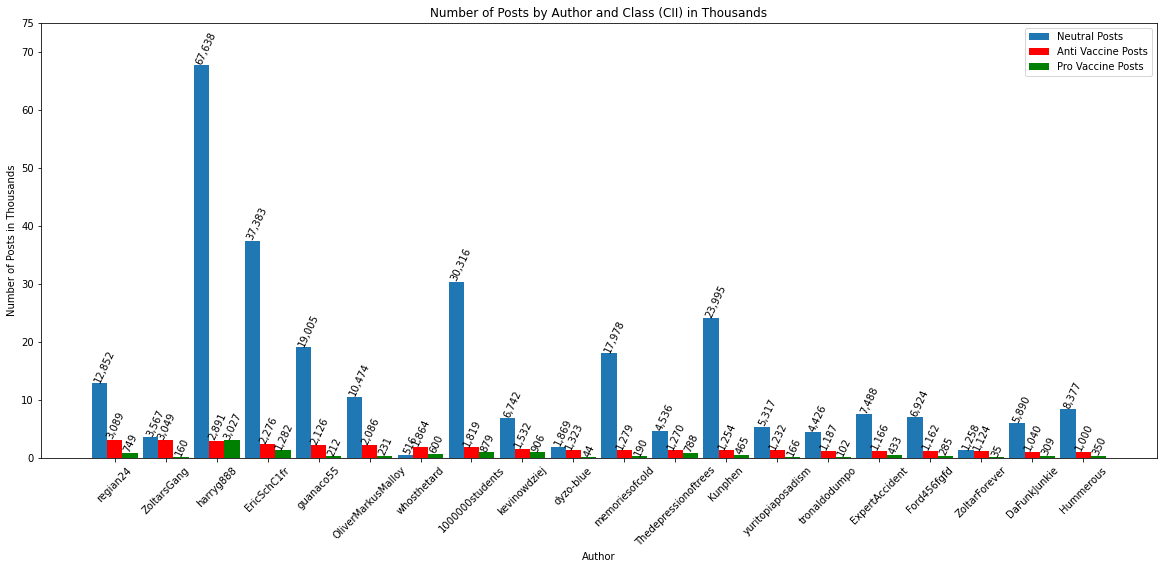

In [142]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 250), "{:,}".format(int(y[i])), ha = 'center', rotation = 65)

authors = top_20['Author']
y = top_20['Neutral Posts']
y1 = top_20['Anti-Vaccine Posts']
y2 = top_20['Pro-Vaccine Posts']
x = np.arange(len(authors))
width = 0.3

fig, ax = plt.subplots(figsize = (20, 8))
rects1 = ax.bar(x - width, y, width, label='Neutral Posts')
rects2 = ax.bar(x , y1, width, label='Anti Vaccine Posts', color='red')
rects3 = ax.bar(x + width, y2, width, label='Pro Vaccine Posts', color='green')
addlabels(x, y, -0.2)
addlabels(x, y1, 0.02)
addlabels(x, y2, 0.32)
plt.title("Number of Posts by Author and Class (CII) in Thousands")
plt.yticks(ticks=[0,10000, 20000, 30000,40000, 50000, 60000, 70000, 75000], labels=[0, 10,20,30,40,50, 60, 70, 75])
plt.ylabel("Number of Posts in Thousands")

plt.xlabel("Author")
plt.xticks(x, authors, rotation=45)
plt.legend()


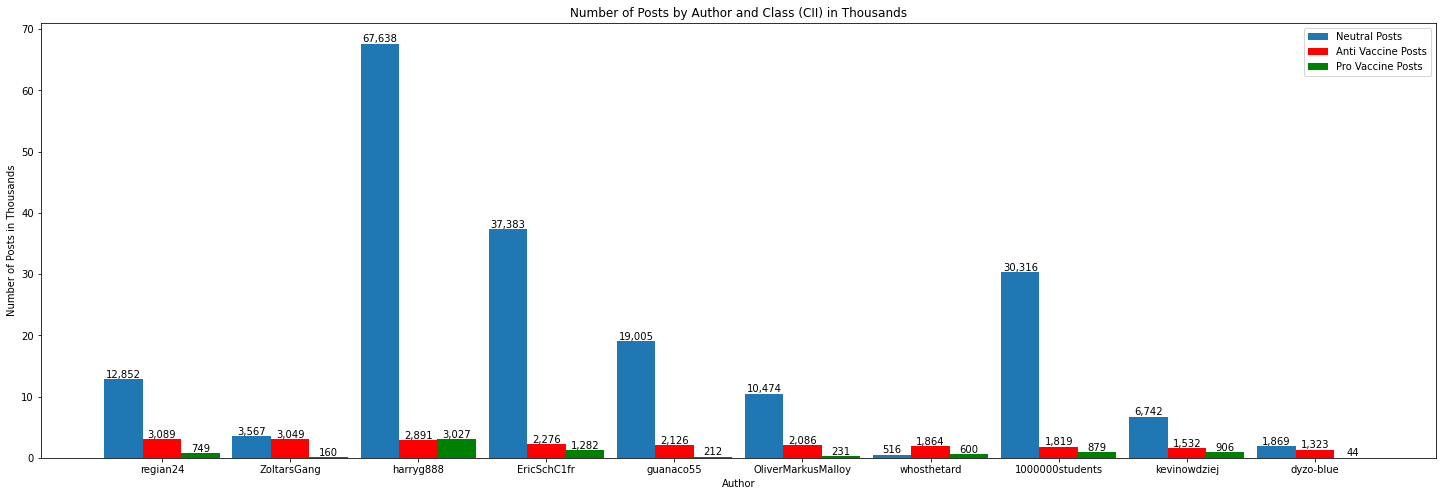

In [99]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 250), "{:,}".format(int(y[i])), ha = 'center', rotation = 0)

authors = top_10['Author']
y = top_10['Neutral Posts']
y1 = top_10['Anti-Vaccine Posts']
y2 = top_10['Pro-Vaccine Posts']
x = np.arange(len(authors))
width = 0.3

fig, ax = plt.subplots(figsize = (25, 8))
rects1 = ax.bar(x - width, y, width, label='Neutral Posts')
rects2 = ax.bar(x , y1, width, label='Anti Vaccine Posts', color='red')
rects3 = ax.bar(x + width, y2, width, label='Pro Vaccine Posts', color='green')
addlabels(x, y, -0.3)
addlabels(x, y1, 0.0)
addlabels(x, y2, 0.3)
plt.title("Number of Posts by Author and Class (CII) in Thousands")
plt.yticks(ticks=[0,10000, 20000, 30000,40000, 50000, 60000, 70000], labels=[0, 10,20,30,40,50, 60, 70])
plt.ylabel("Number of Posts in Thousands")

plt.xlabel("Author")
plt.xticks(x, authors, rotation=0)
plt.legend()


In [122]:
top_10p = df[df['total'] > 300].sort_values(by='p_an', ascending=False)[0:10].reset_index(drop=True)

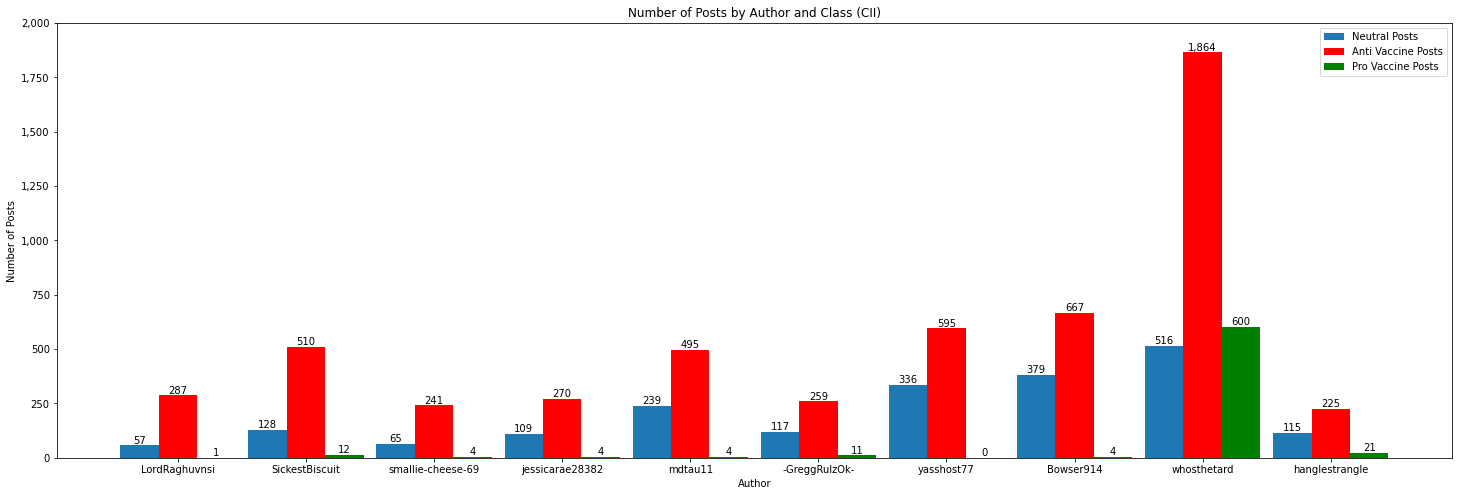

In [126]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 10), "{:,}".format(int(y[i])), ha = 'center', rotation = 0)

authors = top_10p['Author']
y = top_10p['Neutral Posts']
y1 = top_10p['Anti-Vaccine Posts']
y2 = top_10p['Pro-Vaccine Posts']
x = np.arange(len(authors))
width = 0.3

fig, ax = plt.subplots(figsize = (25, 8))
rects1 = ax.bar(x - width, y, width, label='Neutral Posts')
rects2 = ax.bar(x , y1, width, label='Anti Vaccine Posts', color='red')
rects3 = ax.bar(x + width, y2, width, label='Pro Vaccine Posts', color='green')
addlabels(x, y, -0.3)
addlabels(x, y1, 0.0)
addlabels(x, y2, 0.3)
plt.title("Number of Posts by Author and Class (CII)")
plt.yticks(ticks=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000], labels=[0 ,250,500, 750, '1,000' ,'1,250', '1,500', '1,750', '2,000'])
plt.ylabel("Number of Posts")

plt.xlabel("Author")
plt.xticks(x, authors, rotation=0)
plt.legend()


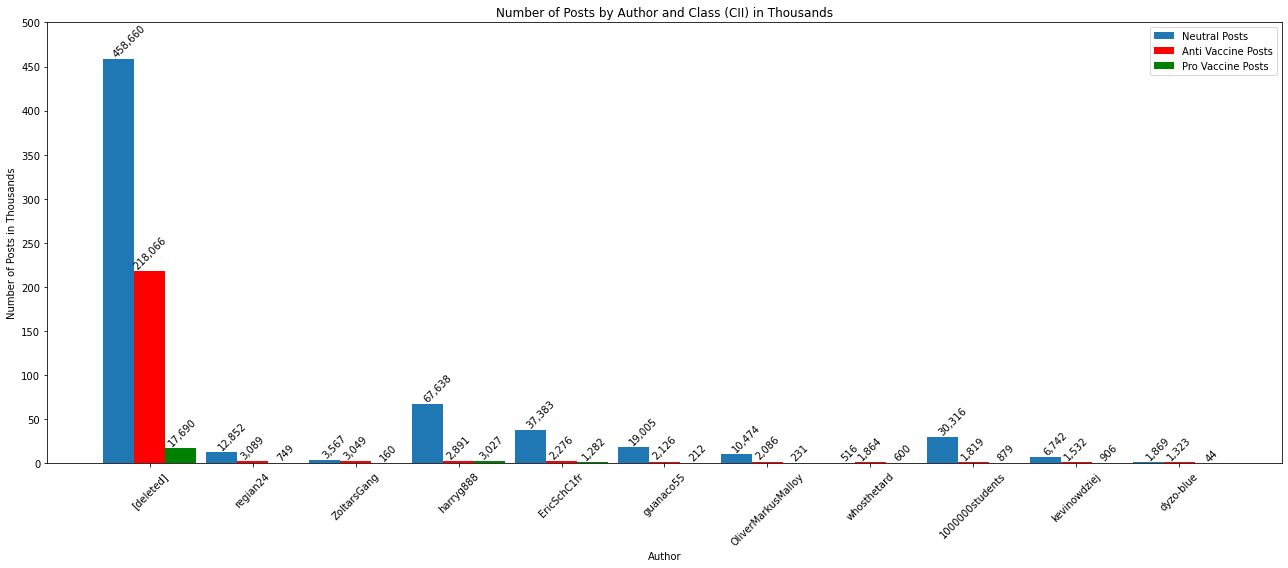

In [146]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 2500), "{:,}".format(int(y[i])), ha = 'center', rotation = 45)

authors = top_11['Author']
y = top_11['Neutral Posts']
y1 = top_11['Anti-Vaccine Posts']
y2 = top_11['Pro-Vaccine Posts']
x = np.arange(len(authors))
width = 0.3

fig, ax = plt.subplots(figsize = (18, 8))
rects1 = ax.bar(x - width, y, width, label='Neutral Posts')
rects2 = ax.bar(x , y1, width, label='Anti Vaccine Posts', color='red')
rects3 = ax.bar(x + width, y2, width, label='Pro Vaccine Posts', color='green')
addlabels(x, y, -0.2)
addlabels(x, y1, 0.0)
addlabels(x, y2, 0.32)
plt.title("Number of Posts by Author and Class (CII) in Thousands")
plt.yticks(ticks=[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000], labels=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
plt.ylabel("Number of Posts in Thousands")

plt.xlabel("Author")
plt.xticks(x, authors, rotation=45)
plt.tight_layout()
plt.legend()

In [12]:
df2 = pd.read_csv('../../Files/Submissions/author_db.csv')

In [45]:
df2 = df2.drop([0,1], axis=0)
df2.rename({'Unnamed: 0': 'Date', 
    'score' : 'Anti-Vaccine Posts', 
    'score.1': 'Neutral Posts', 
    'score.2': 'Pro-Vaccine Posts'}, axis=1, inplace=True)
df2.reset_index(drop=True, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'])

In [13]:
df2.head()

,Unnamed: 0,score,score.1,score.2
0,class_II,0.0,1.0,2.0
1,author,NaN,NaN,NaN
2,------------------16,NaN,1.0,NaN
3,------------------GL,1.0,NaN,1.0
4,------------------O,NaN,5.0,NaN


<AxesSubplot:xlabel='Date'>

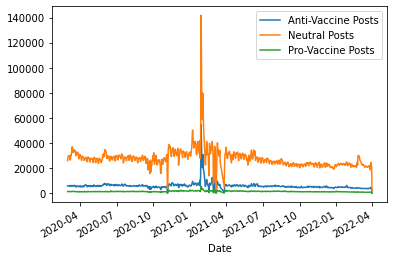

In [50]:
df2.plot(x='Date')